# Codigo del gradiente de una imagen
Leonardo Coronado Arvayo

In [1]:
import numpy as np
n=5
sobelx=np.zeros(shape=(n,n))
sobely=np.zeros(shape=(n,n))
for u in range(0,n):
    for v in range(0,n):
        dx=(int(n/2)-u)
        dy=(int(n/2)-v)
        if (abs(dx)+abs(dy)) == 0:
            sobelx[u,v]==0
            sobely[u,v]==0
        else:
            sobelx[u,v]=abs(dx)/(abs(dx)+abs(dy))
            sobely[u,v]=abs(dy)/(abs(dx)+abs(dy))

In [2]:
sobelx

array([[0.5       , 0.66666667, 1.        , 0.66666667, 0.5       ],
       [0.33333333, 0.5       , 1.        , 0.5       , 0.33333333],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.33333333, 0.5       , 1.        , 0.5       , 0.33333333],
       [0.5       , 0.66666667, 1.        , 0.66666667, 0.5       ]])

In [54]:
import numpy as np
#se pide el tamaño de la matriz
n=5
#se define una matriz de zeros de nxn
a=np.zeros(shape=(n,n))
ax=np.zeros(shape=(n,n))
ay=np.zeros(shape=(n,n))
der=np.zeros(shape=(n,n))
lapx=np.zeros(shape=(n,n))
derx=np.zeros(shape=(n,n))
dery=np.zeros(shape=(n,n))

#se define sigma (dev estandar)
sigx=1
sigy=1

for u in range(0,n):
    for v in range(0,n):
        dx=(int(n/2)-u)
        dy=(int(n/2)-v)
        a[u,v]=np.exp( - ( ( (dx**2)/(2*(sigx**2)) )+( (dy**2)/(2*(sigy**2)) ) ) )
        #a[u,v]=np.exp( - ( ( (dx**2+ dy**2)/(2*np.pi*(sigy**2)) ) ) )
        ax[u,v]= (2*dx/(sigx**2))*a[u,v]
        ay[u,v]= (2*dy/(sigy**2))*a[u,v]
        #derx[u,v]= (2*dx/(np.pi*sigx**2))*a[u,v]*sobelx[u,v]
        #dery[u,v]= (2*dy/(np.pi*sigy**2))*a[u,v]*sobely[u,v]
       # lapx[u,v]=((dx-sigx**2)/(sigx**4))*a[u,v]
        #lapy[u,v]=((dy-sigy**2)/(sigy**4))*a[u,v]
total=np.sum(a)
a=a/total
ax=ax/total
ay=ay/total


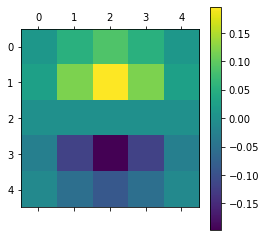

In [71]:
ax
import numpy as np
import matplotlib.pyplot as plt

plt.matshow(ax);
plt.colorbar()
plt.show()

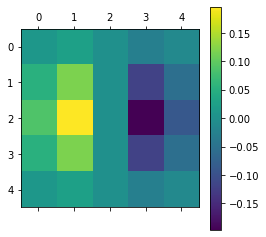

In [72]:
ay
import numpy as np
import matplotlib.pyplot as plt

plt.matshow(ay);
plt.colorbar()
plt.show()

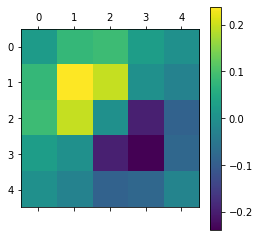

In [73]:
ax+ay
plt.matshow(ax+ay);
plt.colorbar()
plt.show()

In [58]:
import cv2
import skimage as sk
from skimage import data, io, filters
import warnings
from IPython.display import Image
warnings.filterwarnings("ignore")
img = cv2.imread('lena.jpg',0)
# img=sk.io.imread('lena.jpg')

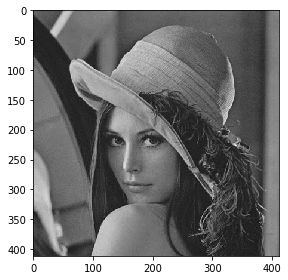

In [59]:
sk.io.imshow(img)

# Derivada con respecto a x

In [60]:
L=img.shape
x=L[0]
y=L[1]
edges=np.zeros(shape=(x,y))
for j in range(0,x):
    for i in range(0,y):
        for u in range(0,n):
            for v in range(0,n):
                d1=(int(n/2)-u)
                d2=(int(n/2)-v)
                if (d1+j)>=0 and (d2+i)>=0 and (d1+j)<x and (d2+i)<y:
                    edges[j,i]=edges[j,i]+ax[d1,d2]*img[d1+j,d2+i]
maxe=np.amax(edges)
mine=np.amin(edges)
for j in range(0,x):
    for i in range(0,y):
        edges[j,i]=( (edges[j,i]-mine)*(255/(maxe-mine)) )

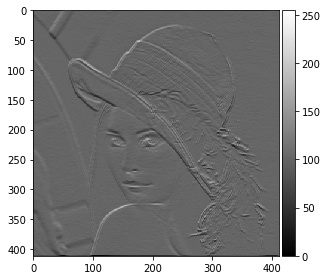

In [61]:


sk.io.imshow(edges, cmap="gray")

# Derivada con respecto a y


In [62]:
L=img.shape
x=L[0]
y=L[1]
edges=np.zeros(shape=(x,y))
for j in range(0,x):
    for i in range(0,y):
        for u in range(0,n):
            for v in range(0,n):
                d1=(int(n/2)-u)
                d2=(int(n/2)-v)
                if (d1+j)>=0 and (d2+i)>=0 and (d1+j)<x and (d2+i)<y:
                    edges[j,i]=edges[j,i]+ay[d1,d2]*img[d1+j,d2+i]
maxe=np.amax(edges)
mine=np.amin(edges)
for j in range(0,x):
    for i in range(0,y):
        edges[j,i]=( (edges[j,i]-mine)*(255/(maxe-mine)) )

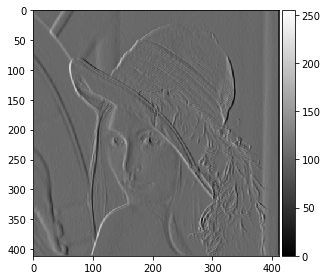

In [63]:
sk.io.imshow(edges, cmap="gray")

# Derivada con respecto a x y y

In [64]:
der=ax+ay
L=img.shape
x=L[0]
y=L[1]
edges=np.zeros(shape=(x,y))
for j in range(0,x):
    for i in range(0,y):
        for u in range(0,n):
            for v in range(0,n):
                d1=(int(n/2)-u)
                d2=(int(n/2)-v)
                if (d1+j)>=0 and (d2+i)>=0 and (d1+j)<x and (d2+i)<y:
                    edges[j,i]=edges[j,i]+der[d1,d2]*img[d1+j,d2+i]
maxe=np.amax(edges)
mine=np.amin(edges)
for j in range(0,x):
    for i in range(0,y):
        edges[j,i]=( (edges[j,i]-mine)*(255/(maxe-mine)) )

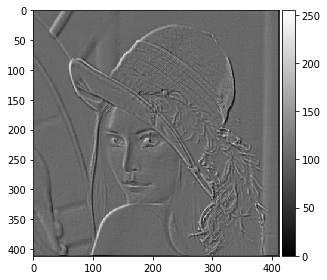

In [65]:
sk.io.imshow(edges,cmap='gray')

In [66]:
#detector de edges

In [67]:
np.mean(edges)


105.566754161595

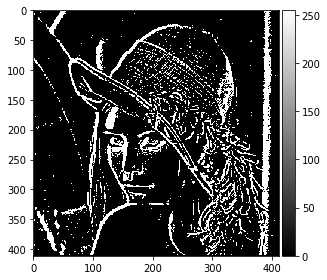

In [70]:
borders=np.zeros(shape=(x,y))
for j in range(0,x):
    for i in range(0,y):
        if edges[j,i]>112:
            borders[j,i]=255
        else:
            borders[j,i]=0
sk.io.imshow(borders,cmap='gray')

# laplaciano de la imagen

In [273]:
lap

array([[ 0.        ,  0.        ,  0.        ],
       [-0.38612941, -0.63661977, -0.38612941],
       [-0.46839865, -0.77225882, -0.46839865]])

In [274]:
for u in range(0,n):
    for v in range(0,n):
            lap[u,v]=np.sqrt(lapx[u,v]**2+lapy[u,v]**2)

lap=lapx+lapy
L=img.shape
x=L[0]
y=L[1]
edges=np.zeros(shape=(x,y))
for j in range(0,x):
    for i in range(0,y):
        for u in range(0,n):
            for v in range(0,n):
                d1=(int(n/2)-u)
                d2=(int(n/2)-v)
                if (d1+j)>=0 and (d2+i)>=0 and (d1+j)<x and (d2+i)<y:
                    edges[j,i]=edges[j,i]+lap[d1,d2]*img[d1+j,d2+i]
maxe=np.amax(edges)
mine=np.amin(edges)
for j in range(0,x):
    for i in range(0,y):
        edges[j,i]=( (edges[j,i]-mine)*(255/(maxe-mine)) )

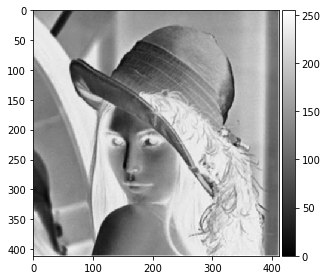

In [275]:
sk.io.imshow(edges, cmap="gray")